In [123]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display


## Fixing this
- something is going wrong as the linear model seems to care how many timepoints are given, even if they are on the same scale
- ie np.linspace(0,1, 1000) gives a different result from np.linspace(0,1,50)
- interestingly, in the second case is where the response plateaus, the first case is where the signal is very high, even higher than the plateau

## Good
- replicated figure 3B

## Next
- figure out what sigma in terms of % BOLD mean? (as Zhou reported the results in that way)

## Linear model

In [219]:
"""TODO fix"""

def IRF(t, tau, n = 2):
    """
    computes neuronal impulse response function with "Gamma shape"
    
    parameters
    t: np.array
        time
    tau: float
        some constant
    """
#     y = t/tau * np.exp(-t/tau)
    y = np.zeros_like(t)
    y += (t / tau)**(n - 1) * np.exp(-t / tau)
    
    
    # normalize
#     y /= np.trapz(y, t)
    y /= np.sum(y)

    return  y 
    

def R_lin(t, tau, g, T_inp):
    
    """
    computes the linear response to a stimulus for
    
    parameters
    t : np.array
        time
    tau : float
        some constant for IRF
    g : float
        gain factor
    T_inp : np.array
        stimulus time course
    """
    
    return g* np.convolve(T_inp, IRF(t, tau), mode = 'full')
#     return g* np.convolve(IRF(t, tau), T_inp, mode = 'same')


def BOLD_lin(g):
    """
    sums the predicted time course over a trial
    """
    
    
    return 



In [147]:
R_lin(t, tau, 5, T_inp).shape
np.linspace(0, 1, conv_length).shape
t = np.linspace(0,1, 50)


In [218]:
@widgets.interact(tau = widgets.FloatSlider(value=.5, min=0, max=1, step=.01))

def plot_IRF(tau):
    plt.plot(t, IRF(t, tau))
    plt.plot(t, gammaPDF(t, tau, 2))
    plt.vlines(tau, 0, .35)

interactive(children=(FloatSlider(value=0.5, description='tau', max=1.0, step=0.01), Output()), _dom_classes=(…

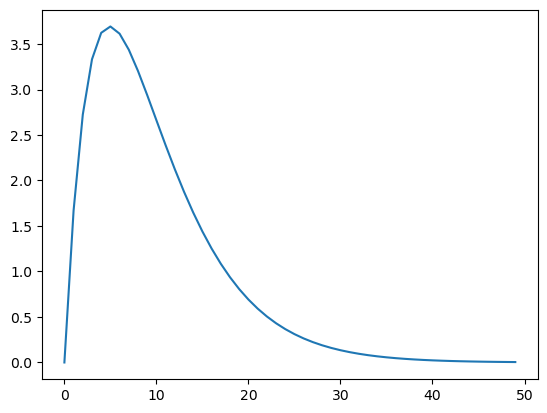

In [151]:
plt.plot(gammaPDF(t, .1, 2))

In [152]:
t

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

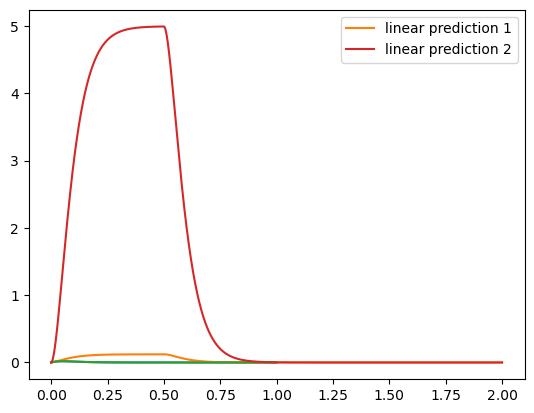

In [115]:
t = np.linspace(0,1, 50)
# t = np.linspace(0, 1, 2000)

T_inp = np.hstack((np.ones(25), np.zeros(25)))

conv_length = len(t) + len(T_inp) - 1

tau = 0.05

plt.plot(t, IRF(t, tau))
# plt.plot(t, T_inp, label = "input")
plt.plot(np.linspace(0,2, conv_length), R_lin(t, tau, 1, T_inp), label = "linear prediction 1")

t = np.linspace(0, 1, 2000)
T_inp = np.hstack((np.ones(1000), np.zeros(1000)))

conv_length = len(t) + len(T_inp) - 1
plt.plot(t, IRF(t, tau))

plt.plot(np.linspace(0,2, conv_length), R_lin(t, tau, 1, T_inp), label = "linear prediction 2")

plt.legend()

In [107]:
np.linspace(0,1, 50)


array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [109]:
np.linspace(0, 1, 2000)

array([0.00000000e+00, 5.00250125e-04, 1.00050025e-03, ...,
       9.98999500e-01, 9.99499750e-01, 1.00000000e+00])

In [4]:
### CHATGPT 

import numpy as np

def conv_cut(stimulus, impulse, nTerms):
    output = np.convolve(np.squeeze(stimulus), np.squeeze(impulse), 'full')
    output = output[:nTerms]
    return output

import numpy as np

def gammaPDF(t, tau, n):
    """
    Gamma function - used for impulse response calculations and HIRF
    :param t: Time steps
    :param tau: Time constant
    :param n: Number of exponentials
    :return: Gamma function values
    """
    if np.isscalar(tau):
        tau = [tau]
    
    y = np.zeros_like(t)
    
    for tau_val in tau:
        y += (t / tau_val)**(n - 1) * np.exp(-t / tau_val)
    
    # Normalize to make the area under the curve equal to 1
    y /= np.trapz(y, t)

    return y

# # Example usage:
# t = np.arange(0, 0.3, 0.005)
# tau = 0.1
# n = 2
# gamma_values = gammaPDF(t, tau, n)

# # Ensure the gamma_values is 1-dimensional
# gamma_values = np.squeeze(gamma_values)


def trf_LinModel(param, stim, t):
    # pre-defined variables
    x = {}
    
    # initiate model fit
    x["scale"] = param
    
    # compute response
    # example time course prediction, not really being used in the paper
    irf = gammaPDF(t, 0.1, 2)  # Assuming gammaPDF is defined
    
    linrsp_tc = np.zeros((stim.shape[0], len(t)))

    for k in range(stim.shape[0]):
        linrsp_tc[k, :] = conv_cut(irf, stim[k, :], len(t))

    # linear prediction used to compute the result in the paper
    linrsp = np.sum(stim, axis=1) * x["scale"]

    return linrsp, linrsp_tc


(60,)


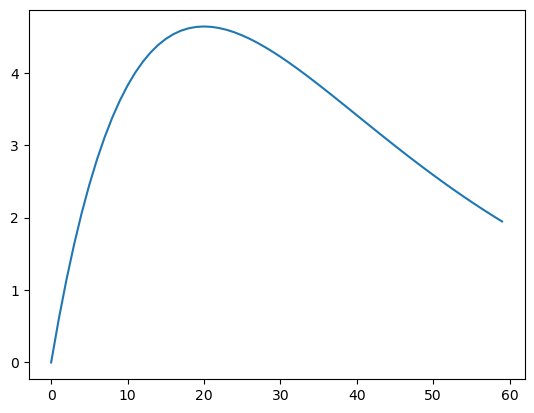

In [142]:
def gammaPDF(t, tau, n):
    """
    Gamma function - used for impulse response calculations and HIRF
    :param t: Time steps
    :param tau: Time constant
    :param n: Number of exponentials
    :return: Gamma function values
    """
    if np.isscalar(tau):
        tau = [tau]
    
    y = np.zeros_like(t)
    
    for tau_val in tau:
        y += (t / tau_val)**(n - 1) * np.exp(-t / tau_val)
    
    # Normalize to make the area under the curve equal to 1
    y /= np.trapz(y, t)
#     y /= np.sum(y)
    

    return y

# Example usage:
t = np.arange(0, 0.3, 0.005)
tau = [0.1]
n = 2
gamma_values = gammaPDF(t, tau, n)
print(gamma_values.shape)
# Ensure the gamma_values is 1-dimensional
# gamma_values = np.squeeze(gamma_values)
plt.plot(gamma_values)
#plt.plot(IRF(t, tau))

In [6]:
t = np.linspace(0,1)
T_inp = np.hstack((np.ones(25), np.zeros(25)))

tau = 0.05
linrsp, linrsp_tc = trf_LinModel(tau, T_inp, t)

# plt.plot(t, IRF(t, tau))
# plt.plot(t, T_inp)
# plt.plot(t, R_lin(t, tau, 1, T_inp)[::2]) # ?? conv still unclear
#plt.plot(t, R_lin(t, tau, 1, T_inp)) # ?? conv still unclear
plt.plot(linrsp)
plt.plot(linrsp_tc)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## CTS model

The linear prediction is divisively normalized?

In [192]:
def cts(t, sigma, g, tau, T_inp):
    return g * (R_lin(t, tau, g, T_inp))**2/ (sigma ** 2 + (R_lin(t, tau, g, T_inp))**2)

## Inputs
Here, we rebuild the used inputs from figure 2 A

In [201]:
durations = [0, 17, 33, 67, 134, 267, 533]
fixed_duration = 134
total_duration = 1000 # 2 seconds, eyeballing from the figure
var_duration = np.vstack([np.hstack((np.ones(duration), np.zeros(total_duration - duration))) for duration in durations])
var_isi = np.vstack([np.hstack((np.ones(fixed_duration), np.zeros(duration), np.ones(fixed_duration), np.zeros(total_duration- duration - 2*fixed_duration))) for duration in durations])

In [117]:
np.linspace(0, 2000, 2000).shape
var_duration

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

Text(0.5, 0.98, 'Reproduction Zhou et al 2018, Fig 4B')

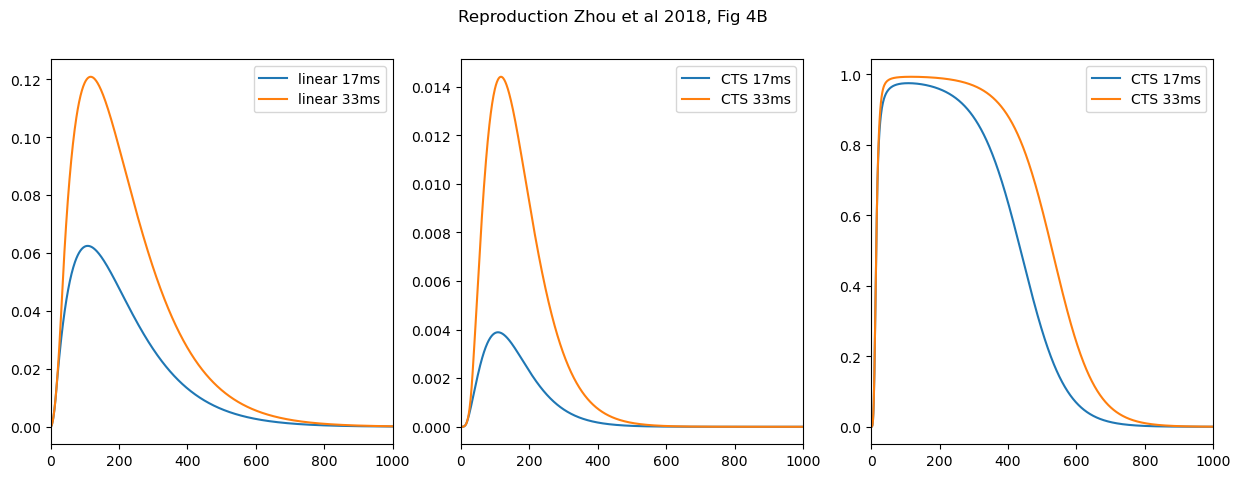

In [197]:
fig, ax = plt.subplots(1,3, figsize = (15, 5))
tau = 100
t = np.linspace(0, 2000, 2000)
# t = np.linspace(0, 1, 2000)
sigma = 1
g = 1

# ax.plot(IRF(t, tau)* 10)
# ax.plot(var_duration[1], label = 'stimulus')
ax[0].plot(R_lin(t, tau, g, var_duration[1]), label = 'linear 17ms')
ax[1].plot(cts(t, sigma, g, tau, var_duration[1]), label = 'CTS 17ms')

ax[0].plot(R_lin(t, tau, g, var_duration[2]), label = 'linear 33ms')
ax[1].plot(cts(t, sigma, g, tau, var_duration[2]), label = 'CTS 33ms')

sigma = .01
ax[2].plot(cts(t, sigma, g, tau, var_duration[1]), label = 'CTS 17ms')
ax[2].plot(cts(t, sigma, g, tau, var_duration[2]), label = 'CTS 33ms')

for axis in ax:
    axis.legend()
    axis.set_xlim(0, 1000)


    #ax.plot(IRF(t, tau))
plt.legend()
fig.suptitle("Reproduction Zhou et al 2018, Fig 4B")

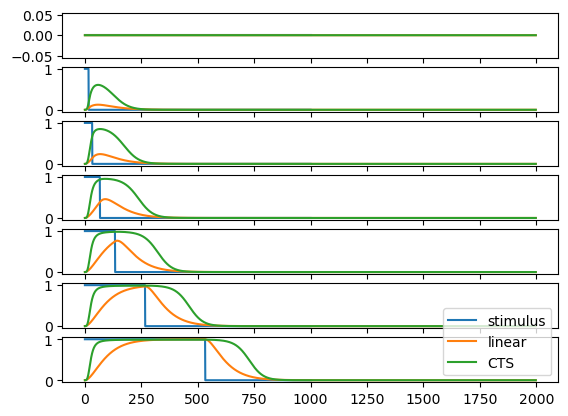

In [222]:
fig, axs = plt.subplots(len(var_duration), 1)
tau = 50
# t = np.linspace(0, 2000, 2000)
t = np.linspace(0, 1000, 1000)
sigma = .1
g = 1

for i, ax in enumerate(axs):
    ax.plot(t, var_duration[i], label = 'stimulus')
    ax.plot(R_lin(t, tau, g, var_duration[i]), label = 'linear')
    ax.plot(cts(t, sigma, g, tau, var_duration[i]), label = 'CTS')
    
    #ax.plot(IRF(t, tau))
plt.legend()

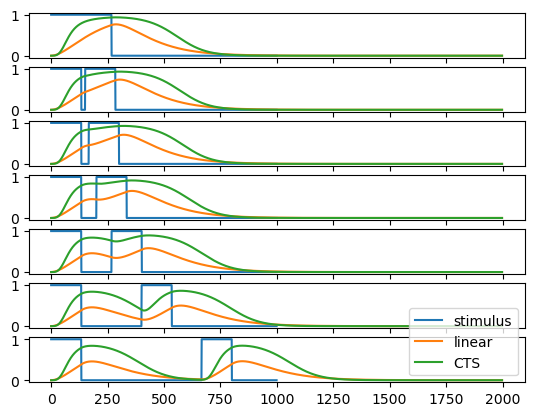

In [209]:
fix, axs = plt.subplots(len(var_isi), 1)
for i, ax in enumerate(axs):
    ax.plot(var_isi[i], label = 'stimulus')
    ax.plot(R_lin(t, tau, g, var_isi[i]), label = 'linear')
    ax.plot(cts(t, sigma, g, tau, var_isi[i]), label = 'CTS')

plt.legend()